# download ERA 5 monthly reanalysis for single level variables (T2M, SST, PRECIP)

In [101]:
%matplotlib inline

In [102]:
import cdsapi
import os
import urllib
import pathlib

NOTE, area selection can be done in the retrieve function by adding this 

```
'area':'90/-180/-90/179.75'
```

to the dictionnary 
    

In [103]:
HOME = pathlib.Path.home()

In [104]:
print(HOME)

/home/nicolasf


In [105]:
dict_variables = {}
dict_variables['T2M'] = '2m_temperature'
dict_variables['PRECIP'] = 'total_precipitation'
dict_variables['SST'] = 'sea_surface_temperature'

In [106]:
var_name = 'T2M'

### define or create the output path 

In [107]:
opath = HOME / 'research' / 'Smart_Ideas' / 'data' / 'REANALYSIS' / 'ERA5' / var_name

In [108]:
if not opath.exists(): 
    opath.mkdir(parents=True)

In [109]:
c = cdsapi.Client()

In [110]:
os.chdir('./')

In [111]:
year = 1979

In [112]:
month = 1

In [113]:
filename = pathlib.Path(opath / f"ERA5_monthly_{var_name}_{year}_{str(month).zfill(2)}.nc")

In [114]:
def retrieve_ERA5_surface(year, month, filename):
    
    data = c.retrieve(
    'reanalysis-era5-single-levels-monthly-means',
    {
        'format':'netcdf',
        'variable':dict_variables[var_name],
        'year':str(year),
        'month':str(month).zfill(2),
        'time':'00:00',
        'product_type': 'monthly_averaged_reanalysis'
    },
    filename)
    return data

In [115]:
data = retrieve_ERA5_surface(year, month, filename)

2020-01-22 11:03:17,485 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels-monthly-means
2020-01-22 11:03:19,915 INFO Request is completed
2020-01-22 11:03:19,917 INFO Downloading http://136.156.133.36/cache-compute-0010/cache/data9/adaptor.mars.internal-1579638483.8971696-24774-11-82a5e3cc-2908-48bb-b23f-ee75ac5d5b84.nc to /home/nicolasf/research/Smart_Ideas/data/REANALYSIS/ERA5/T2M/ERA5_monthly_T2M_1979_01.nc (2M)
2020-01-22 11:03:27,423 INFO Download rate 271.5K/s 


### delete the data on the CDS server (equivalent to using the "Your Requests" CDS interface and manually delete the file)

In [116]:
if filename.exists(): 
    data.delete()
    print(f"cleaning up data on the CDS at {data.location}")
else: 
    try:
        data.download(target=filename)
    except: 
        print(f"unable to download {filename} from {data.location}")

cleaning up data on the CDS at http://136.156.133.36/cache-compute-0010/cache/data9/adaptor.mars.internal-1579638483.8971696-24774-11-82a5e3cc-2908-48bb-b23f-ee75ac5d5b84.nc


In [117]:
import xarray as xr

In [118]:
dset = xr.open_dataset(filename)

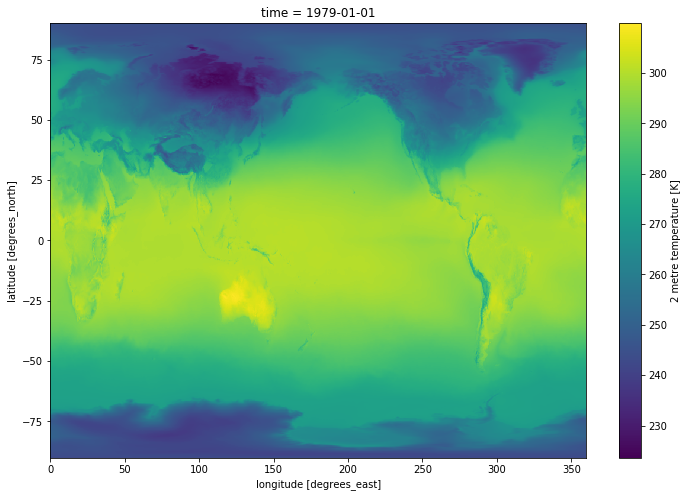

In [119]:
dset.squeeze()['t2m'].plot(figsize=(12, 8))

In [ ]:
dset